In [ ]:
!pip install -U numpy pandas plotnine

# Week 03 Notes

## **Graphing**

#### **The Syntax of `ggplot`**

> The reason we use the functions in plotnine is for consistency in the structure of it’s arguments. Here is the bare bones plotting syntax. All capital letter variables are meanto be filled in, but note that not all variables are required for any given plot type. It will take some time and practice to understand which plot types require which variables.

In [ ]:
import numpy as np
import pandas as pd
import plotnine as pn

In [ ]:
# pn.ggplot(data = DF) + pn.geom_PLOTTYPE(pn.aes(x = "X_VAR", y = "Y_VAR", fill = "FILL_VAR", group = "GROUP_VAR"))

> * `DF` is the name of the DataFrame in which the variables for your plot live
>
> * `PLOTTYPE` is the plot type you want to make e.g. histogram, density, boxplot, point
>
> * `*_VAR` are variables from the DataFrame; don’t forget the quotes



#### `msleep` DataFrame

We'll use the `msleep` DataFrame from the package plotnine.

In [ ]:
from plotnine.data import msleep

msleep

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt,conservation_cat_ord
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000,lc
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,NaN
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350,nt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019,lc
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,domesticated
...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,NaN
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330,NaN
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000,NaN
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380,NaN


#### **Univariate (one variable)**


##### ***categorical variable***

> For one categorical variable, possibly the simplest way to present data is in a table. A table for a categorical variables displays the counts of the unique categories in the variable of interest. Consider the variable conservation in the DataFrame `msleep`.

The **easiest way** to get counts of the categories in the variables conservation is with `.value_counts`.

In [ ]:
msleep["conservation"].value_counts()

conservation
lc              27
domesticated    10
vu               7
en               4
nt               4
cd               2
Name: count, dtype: int64

Alternatively, we could make a bar chart.  Remember, if you want to exclude the
missing data, you have to remove them first from the DataFrame, specifying the
column of interest.

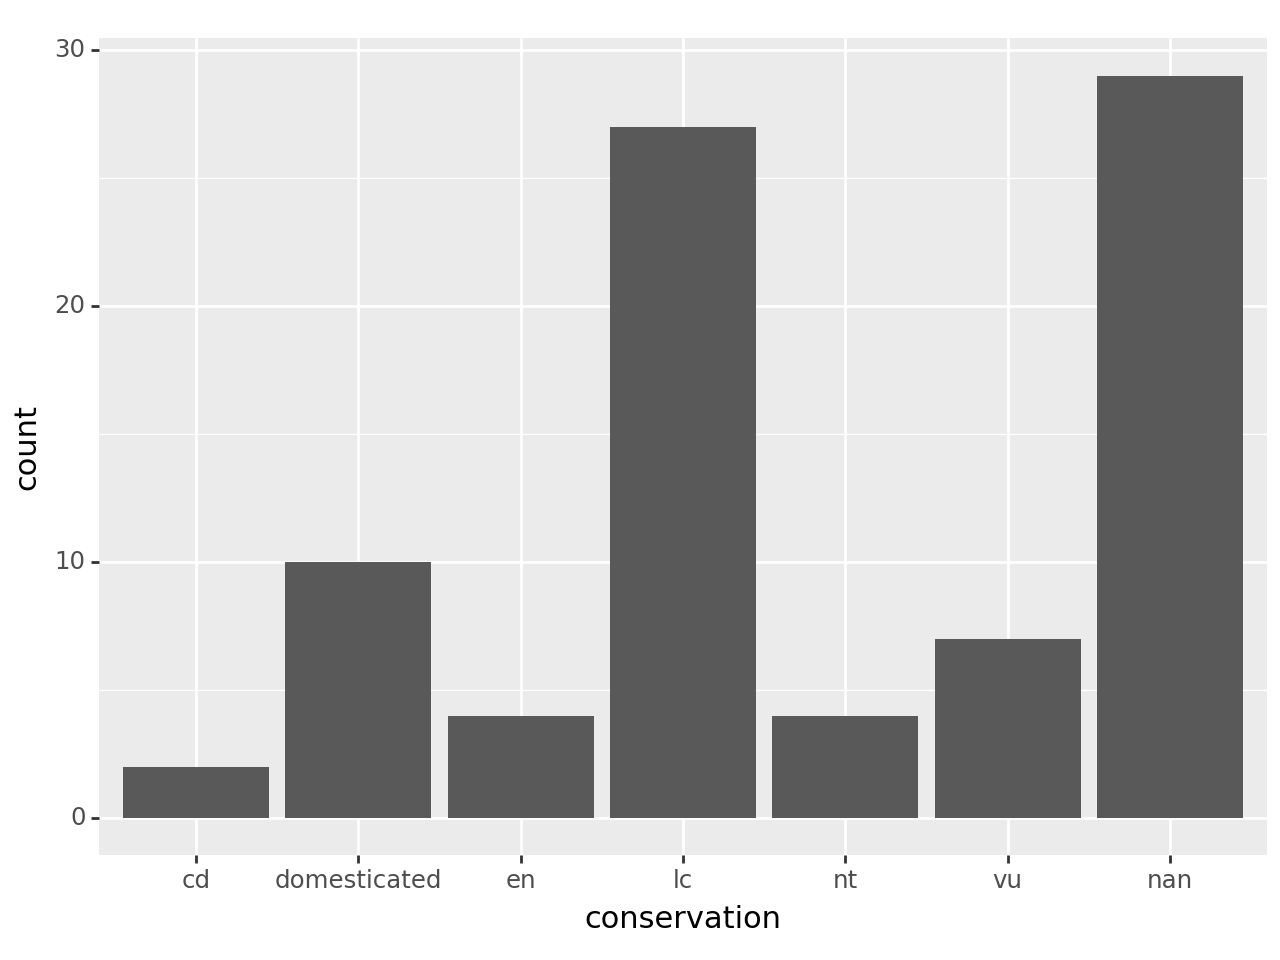

In [ ]:
p = pn.ggplot(data = msleep) + pn.geom_bar(pn.aes(x = "conservation"))
p.draw()

If you want to order the categories in a certain way, you are in charge of
creating a new variable that has the specified order of interest.  Here's some
code to order the categories in decreasing order of their counts.  Note that
missing values are always drawn last, even if this seems to mess up the
ordering.

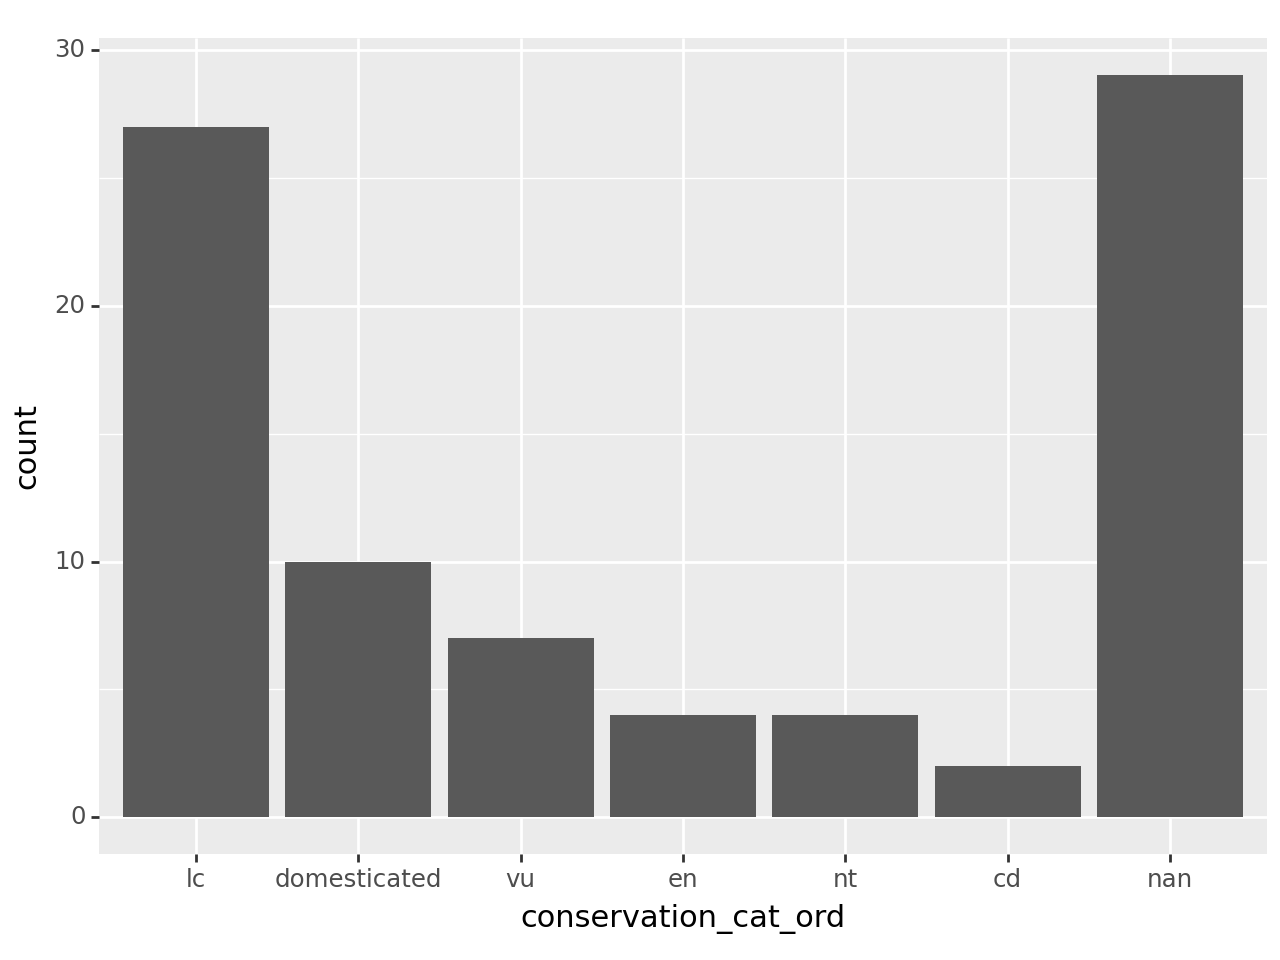

In [ ]:
conservation_cats_ord = msleep["conservation"].value_counts().index.tolist()
msleep["conservation_cat_ord"] = pd.Categorical(msleep["conservation"], categories = conservation_cats_ord)

p = pn.ggplot(data = msleep) + pn.geom_bar(pn.aes(x = "conservation_cat_ord"))
p.draw()

You could also use list indexing to order the categories in increasing order.

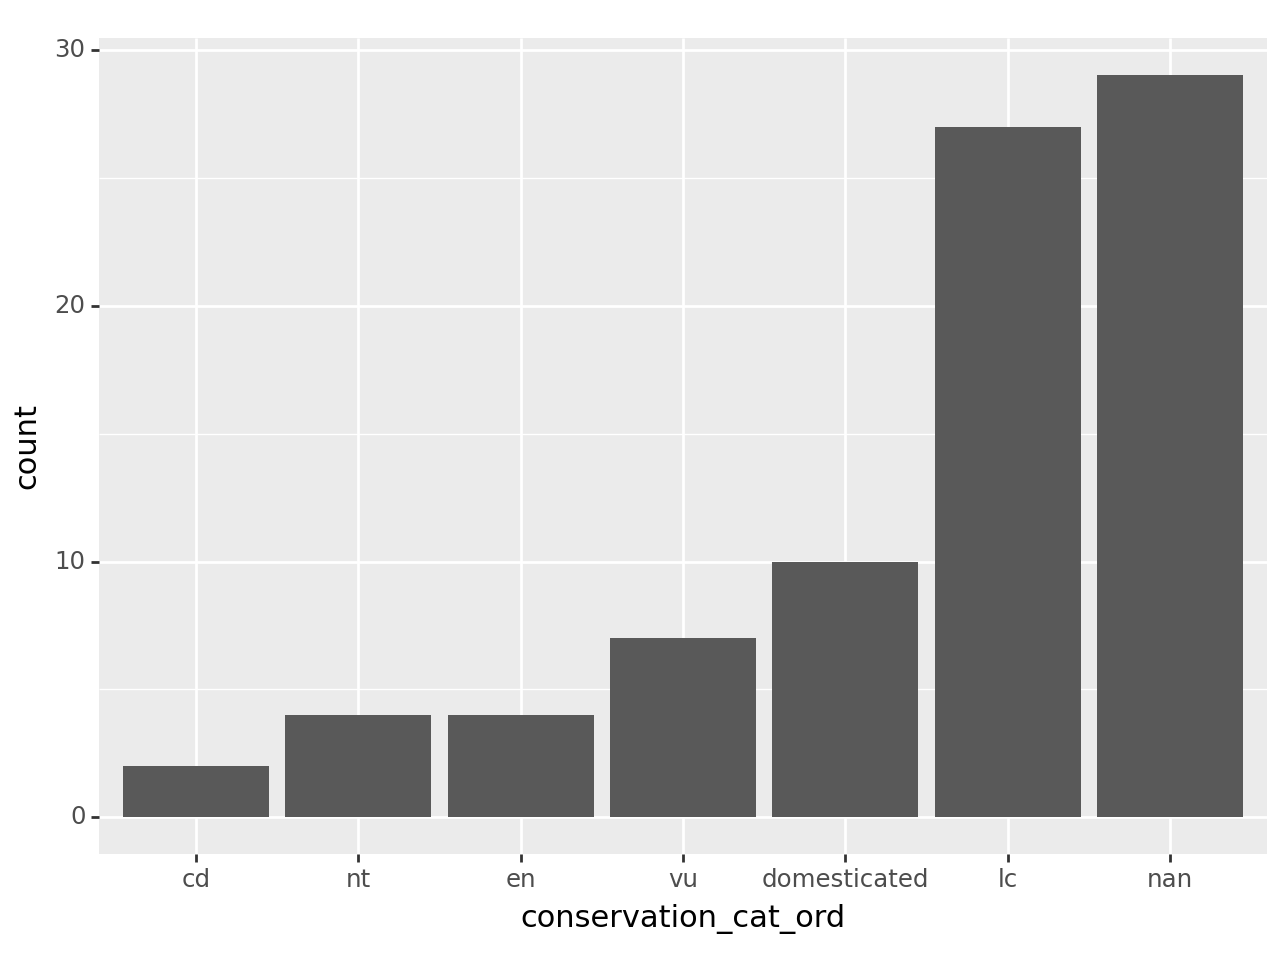

In [ ]:
msleep["conservation_cat_ord"] = pd.Categorical(msleep["conservation"], categories = conservation_cats_ord[::-1]) # notice the indexing

p = pn.ggplot(data = msleep) + pn.geom_bar(pn.aes(x = "conservation_cat_ord"))
p.draw()

>`Nan` chart is always at the far right

##### ***numeric variable***

> Rather than showing the value of each observation of a numeric variable, it is
common to display the value as belonging to a bin. The height of each bar in a
histogram records the frequency of values that fall into each bin.  The *x-axis*
for a histogram is different from a bar chart, because a histogram has a numeric
*x-axis*, whereas a bar chart has a categorical *x-axis.*

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


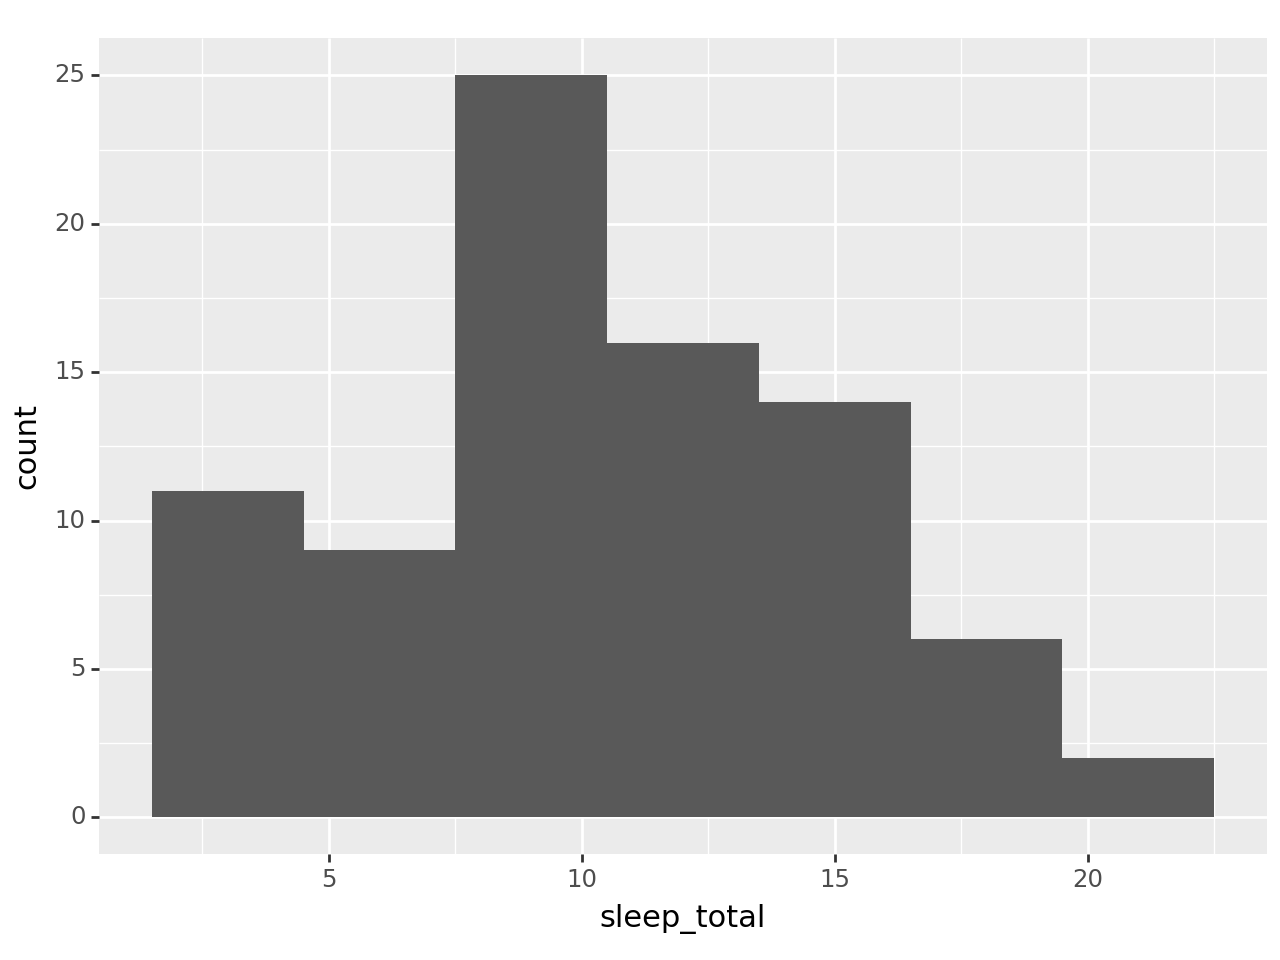

In [ ]:
p = pn.ggplot(data = msleep) + pn.geom_histogram(pn.aes(x = "sleep_total"))
p.draw()

**NOTE:** Notice that plotnine issued a warning about choosing the number of `bins`. If you don’t specify the number of `bins`, plotnine will choose for you, and also yell at you.

There is no one right choice for the number of bins.  Generally, between 7 and
51 are good first guesses.

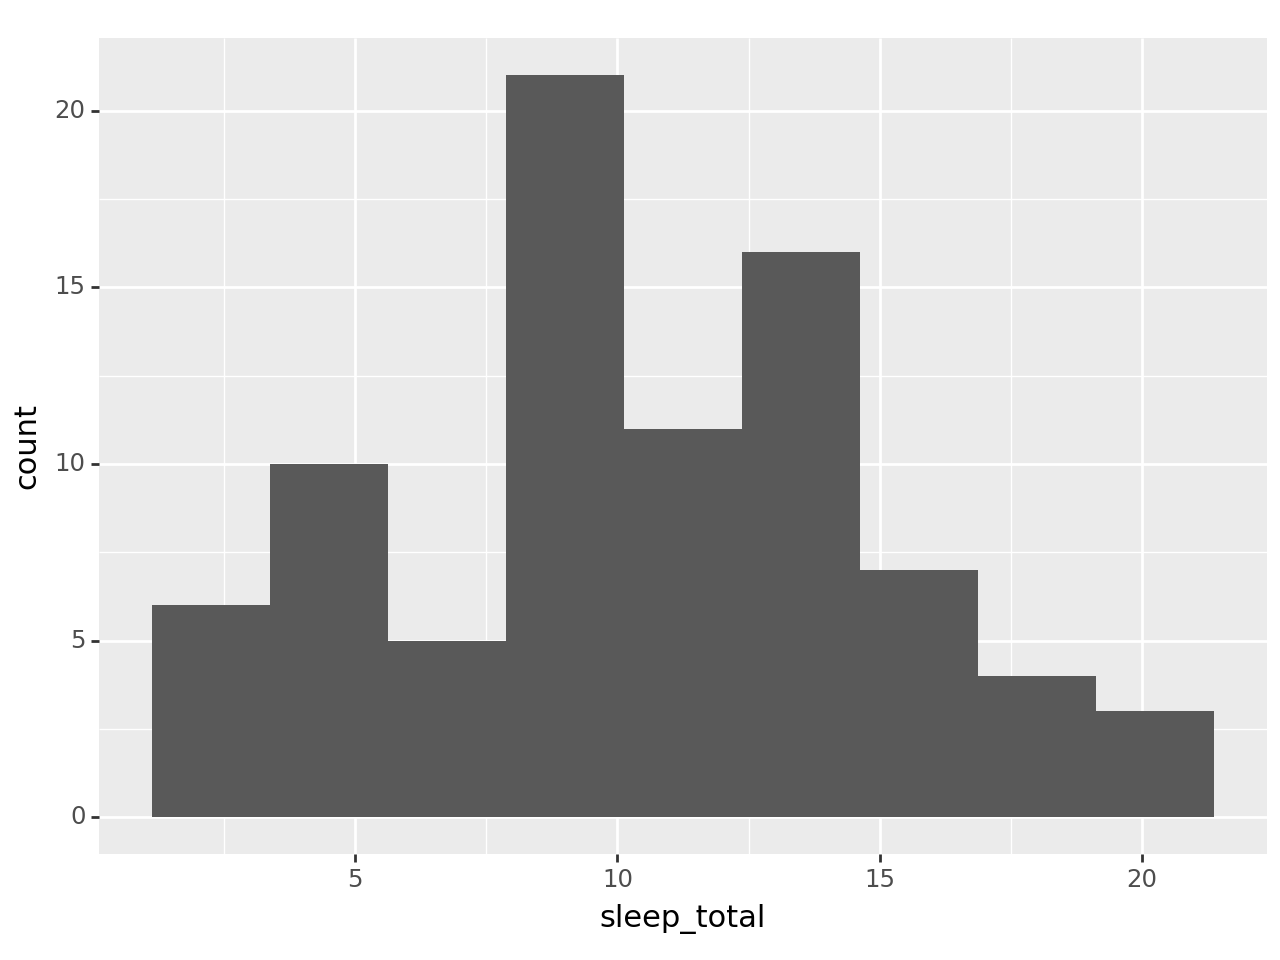

In [ ]:
p = pn.ggplot(data = msleep) + pn.geom_histogram(pn.aes(x = "sleep_total"), bins = 9)
p.draw()

A density plot is like a histogram that has been smoothed over.

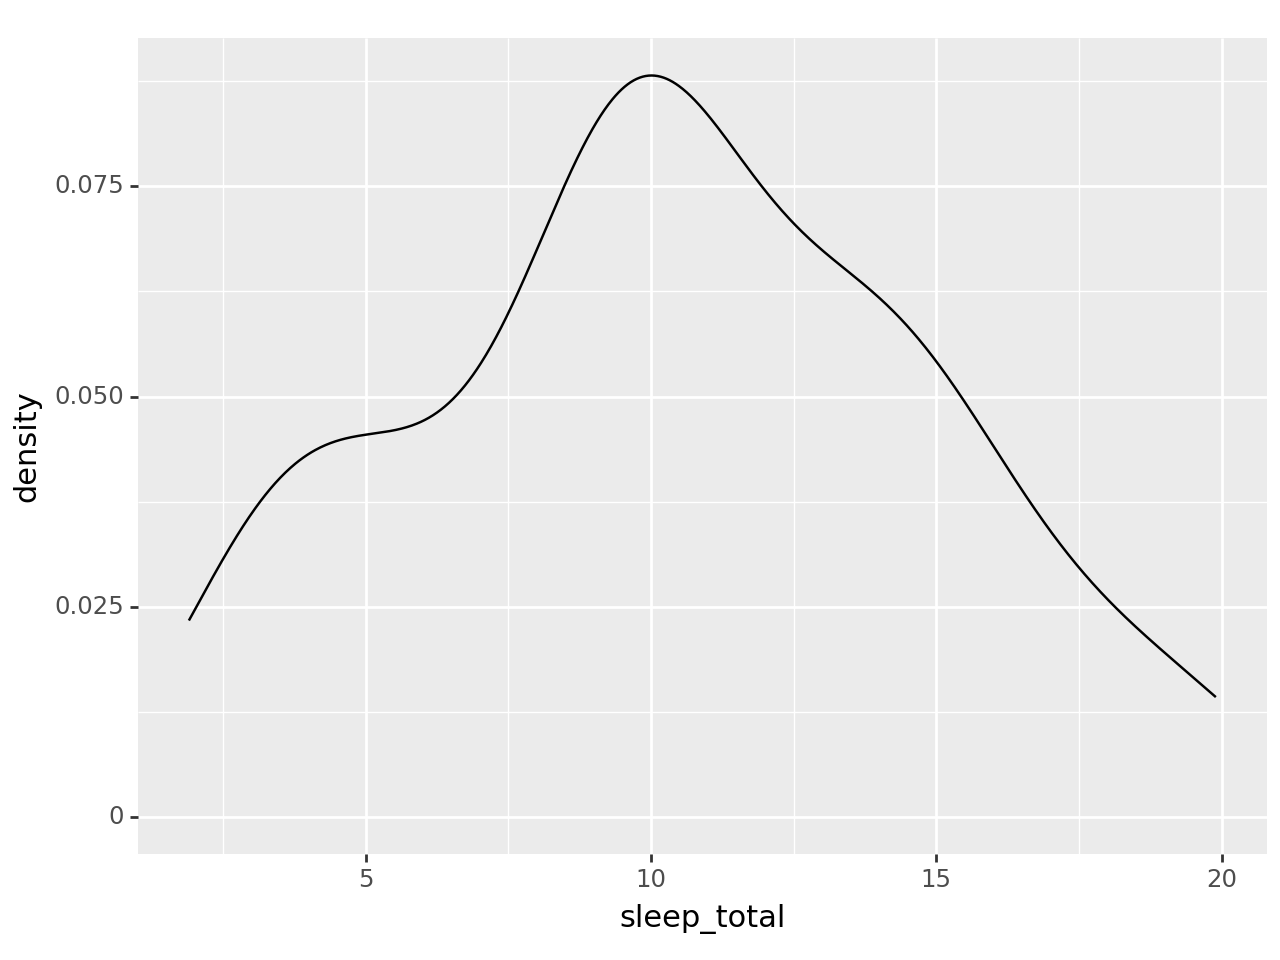

In [ ]:
p = pn.ggplot(data = msleep) + pn.geom_density(pn.aes(x = "sleep_total"))
p.draw()

The benefit of adding `+` layers of `geom_PLOTTYPE`s is that we can combine
plots to help us understand better the data.  The code below layers a histogram
and a density plot, and specifies two other options.  First, to force the
histogram onto the samw scale as a density plot, use `y =
pn.after_state("density")`.  Second, we make transparent the histogram by
specifying `alpha = 0.5`.  The keyword argument `alpha` ranges from `1`, by
default, to `0` completely transparent.

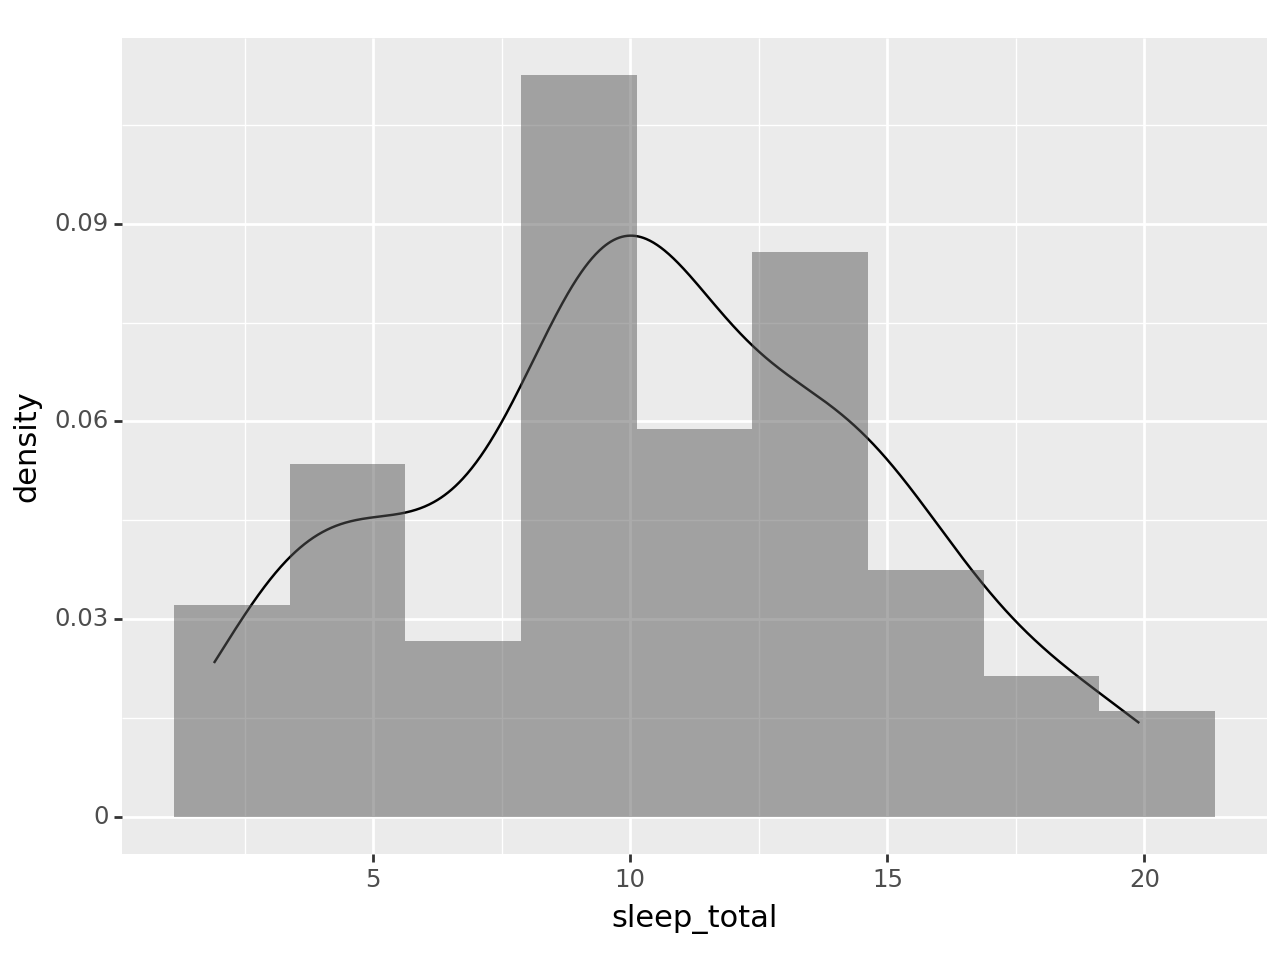

In [ ]:
p = (pn.ggplot(data = msleep)
    + pn.geom_density(pn.aes(x = "sleep_total"))
    + pn.geom_histogram(pn.aes(x = "sleep_total",  y = pn.after_stat("density")), alpha = 0.5, bins = 9))
p.draw()

> * `Alpha` adjusts the greyscale. It ranges from `0` to `1`.
* `Alpha` can be used in density and more.

> **NOTE:** Last bottom layer is closest to front.

#### **Bivariate (two variables)**

##### ***categorical variables***

> More sophisticated tables of categorical variables can be with the Pandas
function `pd.crosstab`.  One of the benefits of `pd.crosstab` is that you cross
tabulate multiple Series.

In [ ]:
pd.crosstab(msleep["conservation"], msleep["vore"])

vore,carni,herbi,insecti,omni
conservation,,,,
cd,1,1,0,0
domesticated,2,7,0,1
en,1,2,1,0
lc,5,10,2,8
nt,1,3,0,0
vu,4,3,0,0


You can also request proportions, instead of counts in the cross tabulated
table.  If you want to get proportions relative to the rows, you specify the
keyword argument `normalize` equal to `"index"`.  If you want proportions
relative to the columns, use `"columns"`.  And if you want proportions relative
to the entire table, use `"all"`.

In [ ]:
pd.crosstab(msleep["conservation"], msleep["vore"], normalize = "all").round(3)

vore,carni,herbi,insecti,omni
conservation,,,,
cd,0.019,0.019,0.000,0.000
domesticated,0.038,0.135,0.000,0.019
en,0.019,0.038,0.019,0.000
lc,0.096,0.192,0.038,0.154
nt,0.019,0.058,0.000,0.000
vu,0.077,0.058,0.000,0.000


The plot equivalent of a cross tabulated table might be a grouped bar chart.  As
of 2023-12-20, plotnine will yell at you if there are any missing
data, so let's remove the missing data from our two variables of interest first.

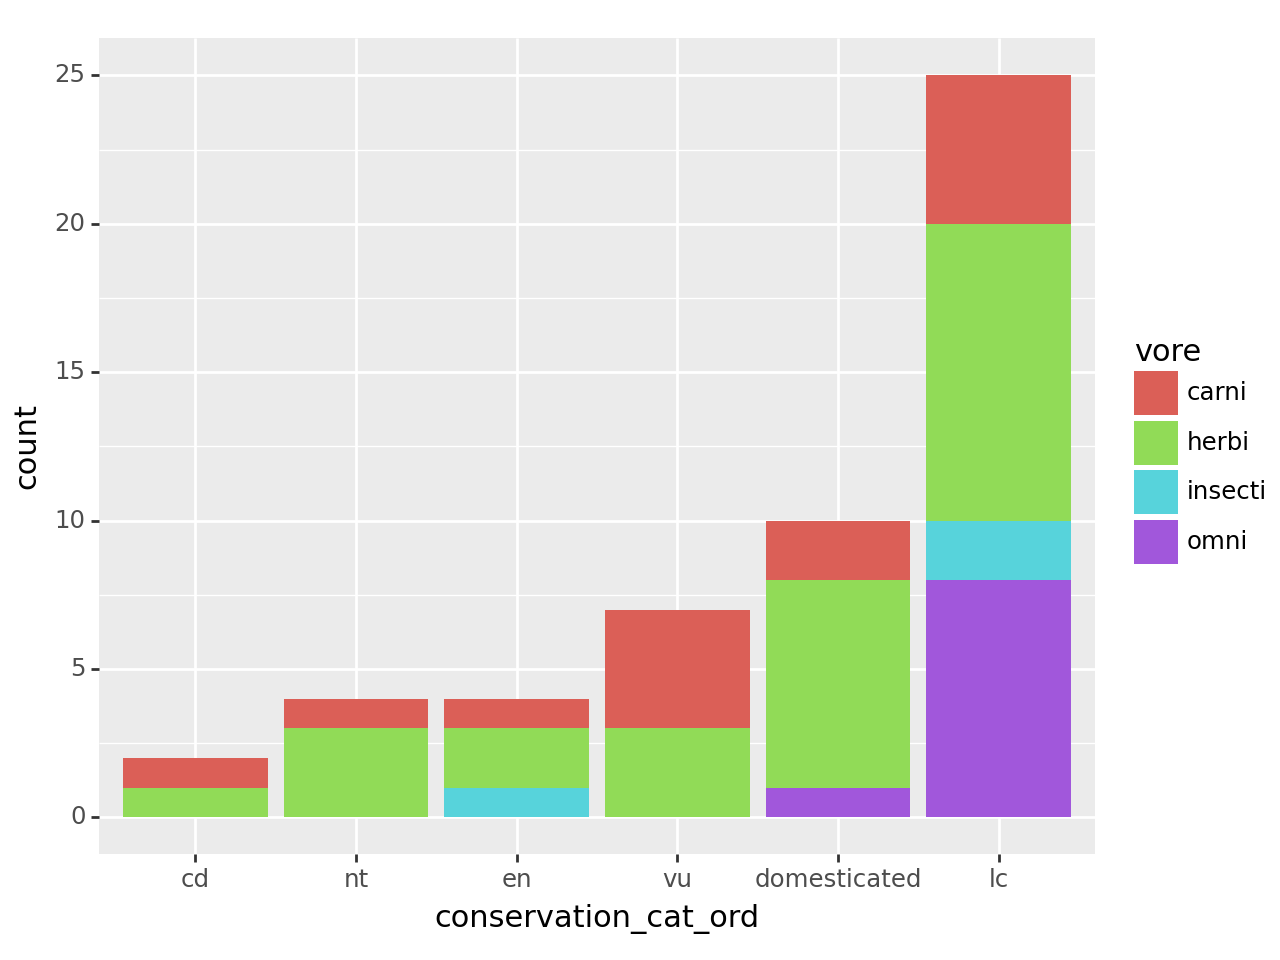

In [ ]:
df = msleep.dropna(subset = ["conservation_cat_ord", "vore"])
p = (pn.ggplot(data = df)
    + pn.geom_bar(pn.aes(x = "conservation_cat_ord", fill = "vore")))
p.draw()

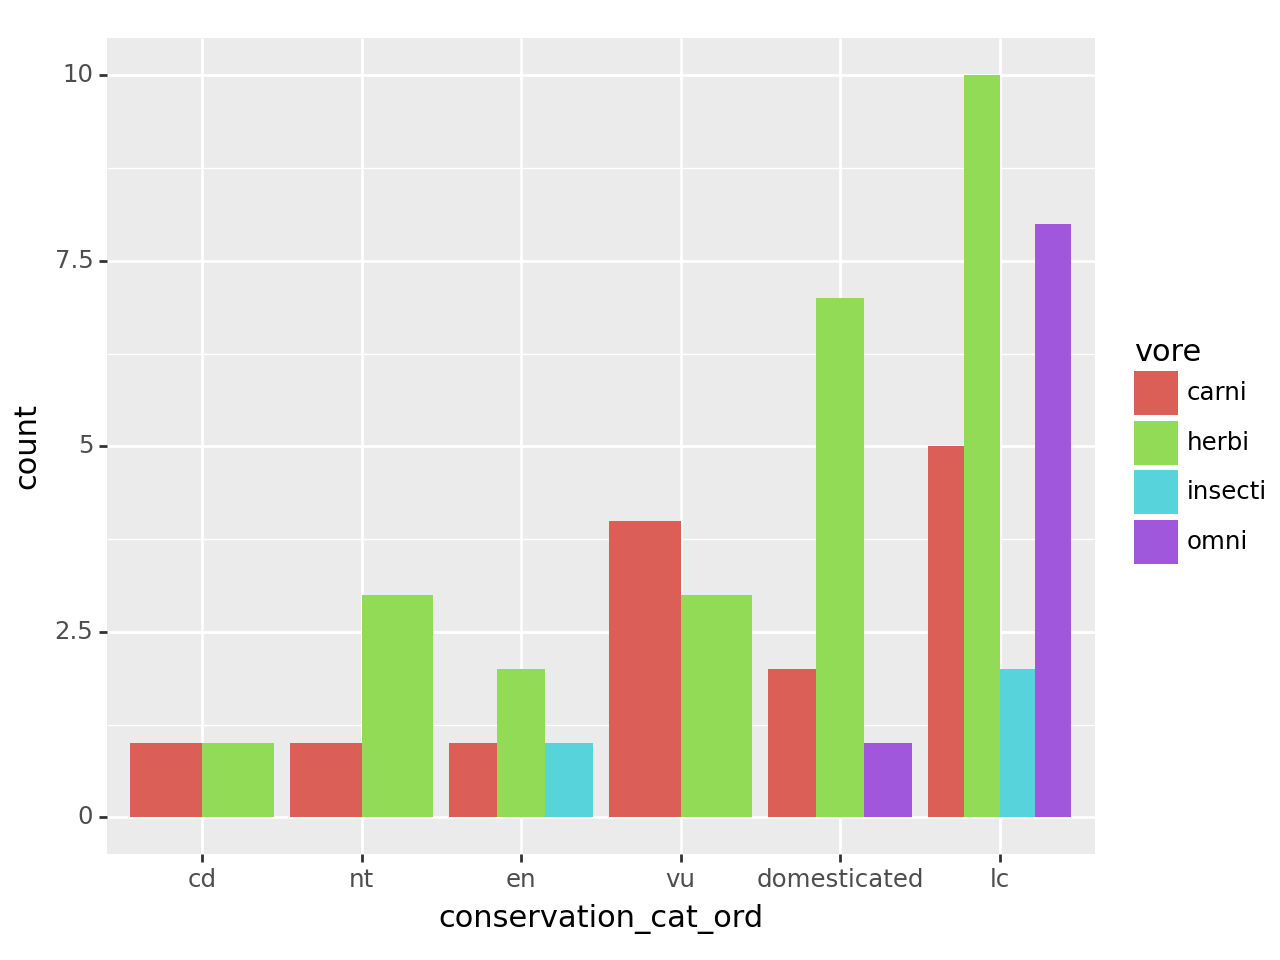

In [ ]:
df = msleep.dropna(subset = ["conservation_cat_ord", "vore"])
p = pn.ggplot(data = df) + pn.geom_bar(pn.aes(x = "conservation_cat_ord", fill = "vore"), position = "dodge")
p.draw()

##### ***numerical variables***

> The most common method of visualizing the relationship between two numeric
variables is by using a scatterplot.  With `ggplot` we specify both the x and y
variables, and the geometry `geom_point`.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 27 rows containing missing values.


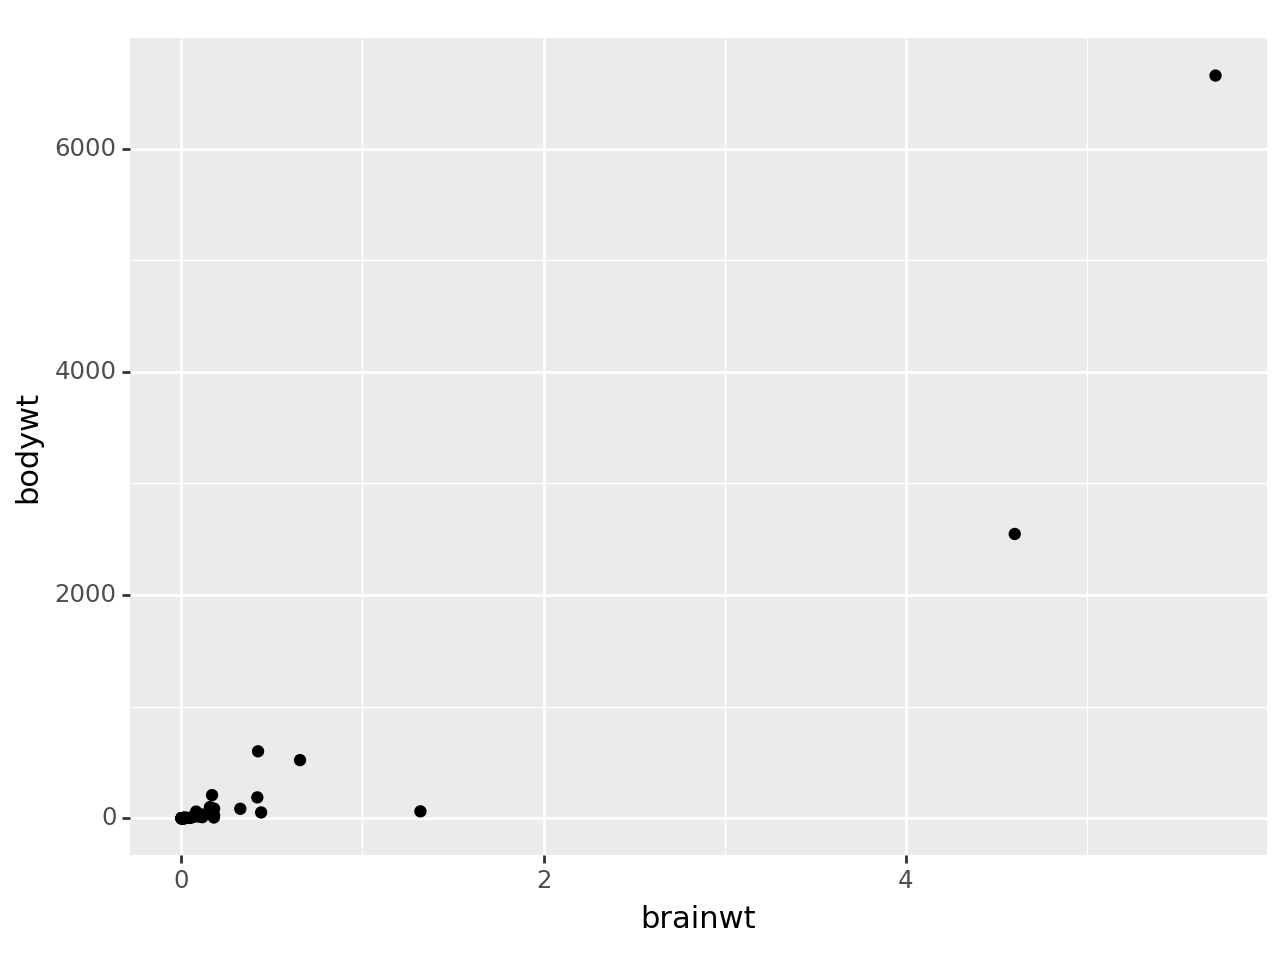

In [ ]:
p = (pn.ggplot(msleep, pn.aes(x = "brainwt", y = "bodywt"))
    + pn.geom_point())
p.draw()

The most common trend line added to a scatterplot is the so called best fit, or
least squares line. This is done by adding a `geom_smooth()` layer.  A least
squares line should only be used for linearly related numerical variables, and
sometimes you can help linearize variables with log transformations.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 27 rows containing missing values.


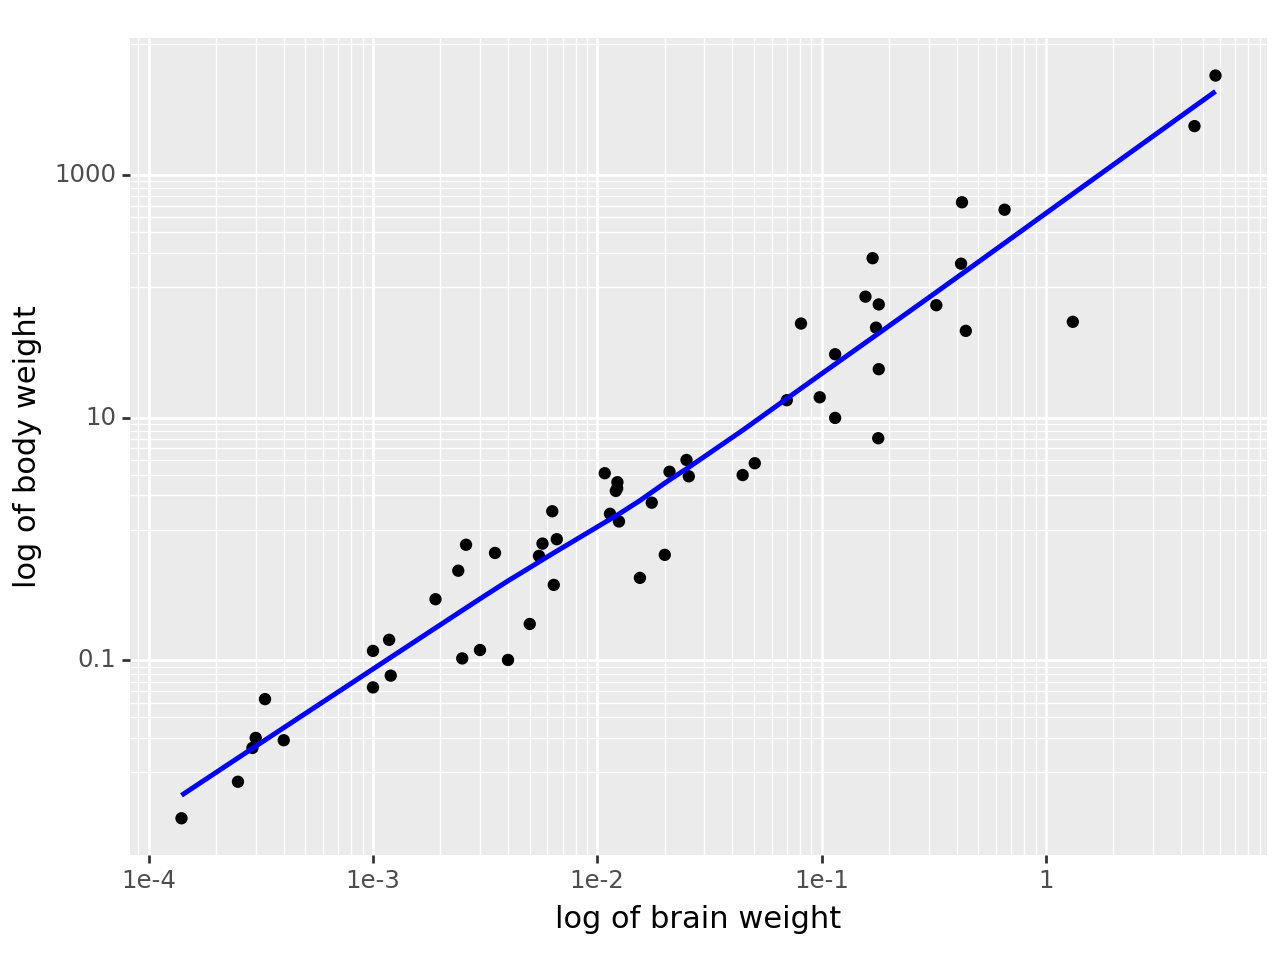

In [ ]:
p = (pn.ggplot(msleep, pn.aes(x = "brainwt", y = "bodywt"))
    + pn.geom_point()
    + pn.geom_smooth(se = False, color = "blue")
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.labs(x = "log of brain weight", y = "log of body weight"))
p.draw()

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 27 rows containing missing values.


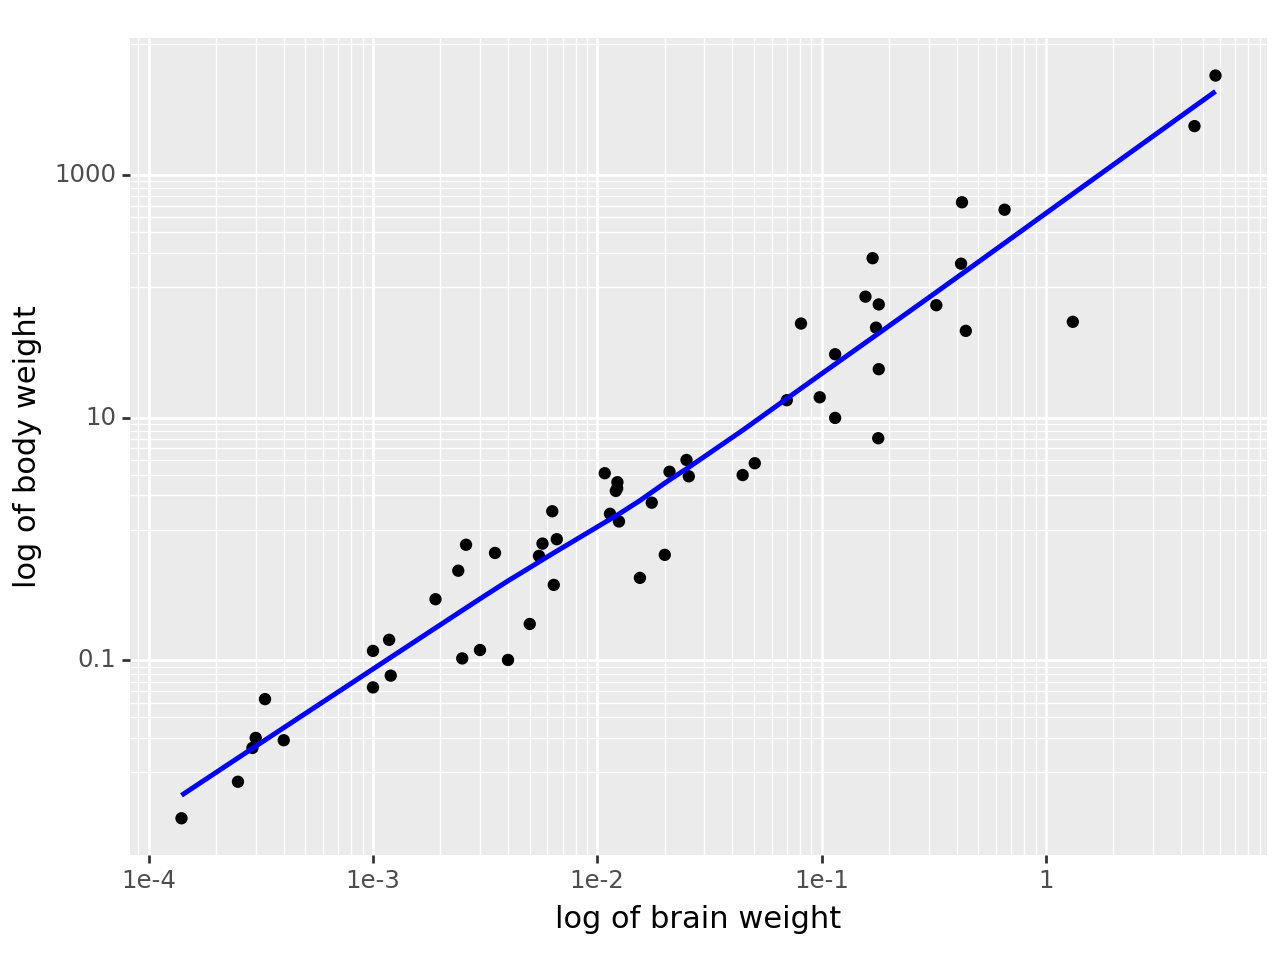

<Figure Size: (640 x 480)>

In [ ]:
(pn.ggplot(msleep, pn.aes(x = "brainwt", y = "bodywt"))
    + pn.geom_point()
    + pn.geom_smooth(se = False, color = "blue")
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.labs(x = "log of brain weight", y = "log of body weight"))

> * Looking back at the slightly changed in syntax in the last two plots.
* Both the dataset and the aesthetic specification showed up as positional arguments, instead of the dataset as a keyword argument and the aesthetic specification in the geometry layer.
* With the syntax as in the last two examples, the aesthetic specification is shared across both the `geom_point` and the `geom_smooth` layers.
* All other examples have provided a syntax where the aesthetic is specific to a single layer and not all subsequenty layers.

##### ***numerical and categorical***

> One can combine plots for numeric variables with categorical information by
repeating each plot type above for each category of a categorical variable,
where each category is drawn in a unique color.  When coloring across a
categorical variable like this, a legend becomes necessary.

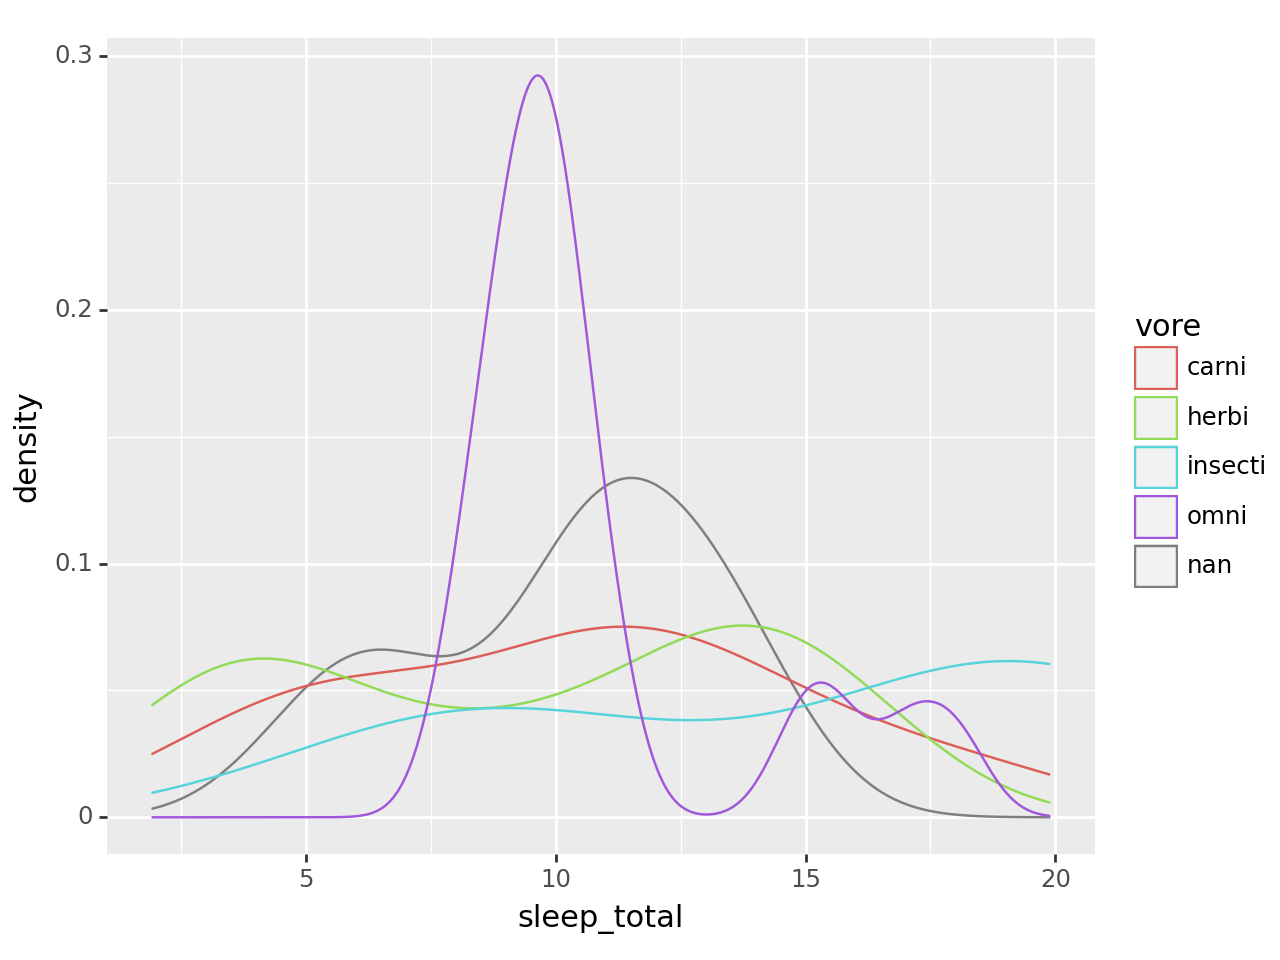

In [ ]:
p = (pn.ggplot(data = msleep)
    + pn.geom_density(pn.aes(x = "sleep_total", color = "vore")))
p.draw()

Alternatively, you can put the categorical variable on an axis and summarize the
numerical variable on the other axis.

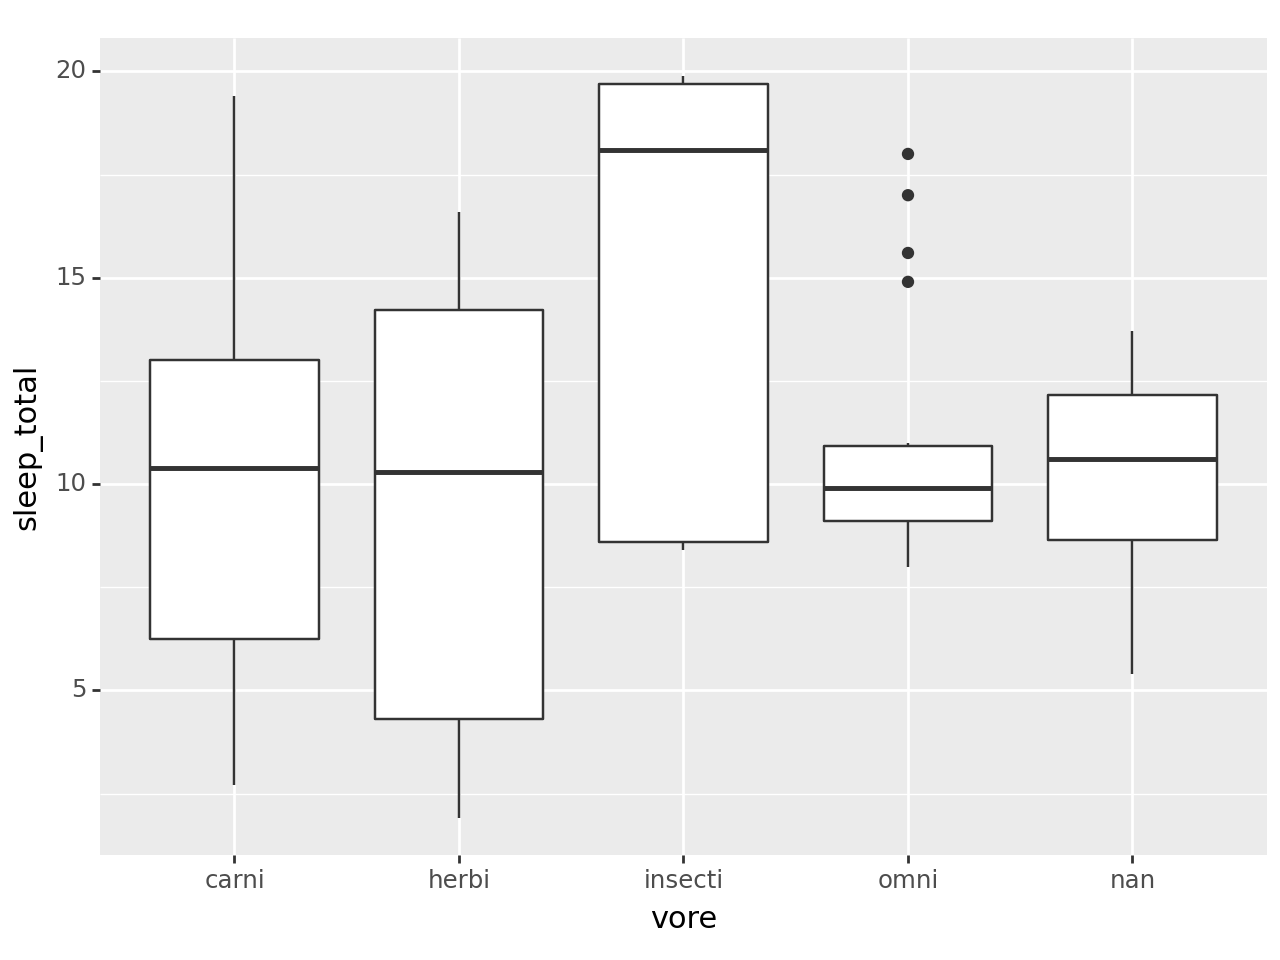

In [ ]:
p = (pn.ggplot(data = msleep)
    + pn.geom_boxplot(pn.aes(x = "vore", y = "sleep_total")))
p.draw()

Sometimes it is helpful to add a violin plot layer, if the box plots are not
capturing all of the information in the density of the data.  Otherwise, it can
just be fun.

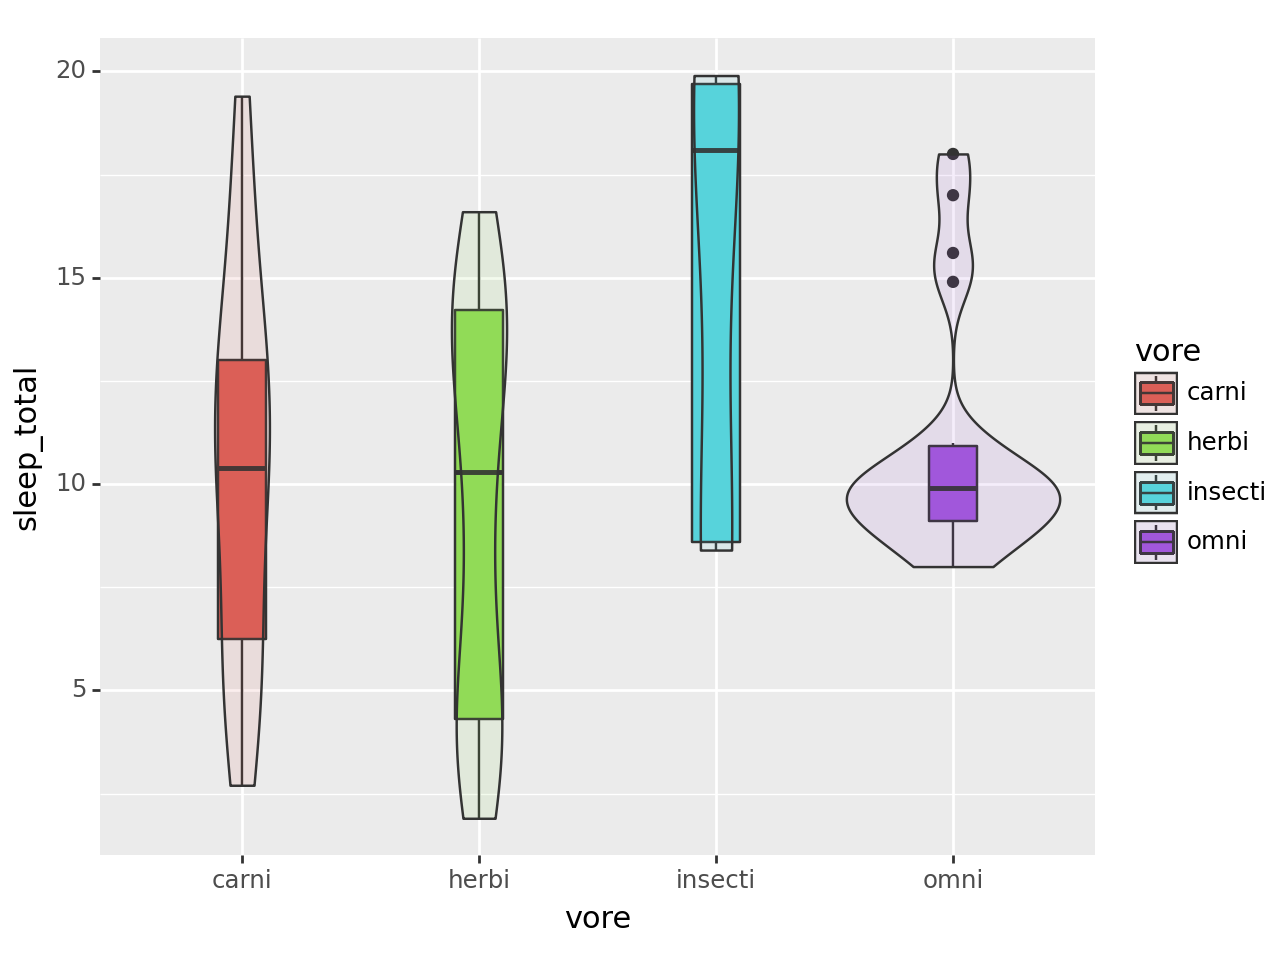

In [ ]:
df = msleep.dropna(subset = "vore")
p = (pn.ggplot(df, pn.aes(x = "vore", y = "sleep_total", fill = "vore"))
    + pn.geom_boxplot(width = 0.2)
    + pn.geom_violin(alpha = 0.1))
p.draw()

> We can change color too

> * It seems as of 2023-12-23 that `fill`ing by a categorical variable does not work appropriately if there is any missing data. The plot above works, if you first drop the NAs.

## **Aggregating**

> The latter plots above provide **graphical summaries**  of numerical variables across a categorical variable. *Aggregating*, or aggregation, is all about **calculating** summaries of numerical across a categorical variable.


The first step in aggregating is to group a DataFrame by the categories, or
levels, of some categorical variables.  The Pandas function `groupby` carries
out this task for us.  You can group by a single categorical variable, as we do
below, or group by a list of categorical variables.

In [ ]:
gdf = msleep.groupby("vore", as_index = False)
gdf

<ipython-input-37-a4ba7897ff7c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


By itself, `groupby` is pretty boring and doesn't obviously do much.  The real
power of `group` by is when you couple it with the function `aggregate`.

> **sd** is standard deviations.

In [ ]:
odf = gdf.aggregate(
    mean = ("sleep_total", np.mean),
    sd = ("sleep_total", np.std),
    count = ("sleep_total", np.size))
odf

<ipython-input-38-ac1db4af7c6e>:1: FutureWarning: The provided callable <function mean at 0x7947a53831c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
<ipython-input-38-ac1db4af7c6e>:1: FutureWarning: The provided callable <function std at 0x7947a53832e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,vore,mean,sd,count
0,carni,10.378947,4.669116,19
1,herbi,9.509375,4.878746,32
2,insecti,14.940000,5.920557,5
3,omni,10.925000,2.949019,20


> The structure of the `aggregate` code above is the most explicit, in the hope that you can see all the necessary pieces of the puzzle and understand how they fit together.

> The basic pattern of the keyword arguments to `aggregate` go like this. You specify as a keyword argument the name of the output variable of interest. These output variables will show up as columns of the output DataFrame, along side the grouping variable(s). So we actively chose the output variable names `mean`, `sd`, and `count`. We could have just as well chosen the output variables names to be `horse`, `octopus`, and `badger`, but obviously more meaningful variables are better.

> On the right hand side of each equals sign, for each keyword argument, you put within a left/open and right/close parenthesis the name of the numerical variable you want to act on, and then the function that will act on the numerical variable you specified. The numerical variable must live in the DataFrame you are aggregating, and the function to be applied to your numerical variable must take only one numerical variable as its first argument, as does `np.mean`, `np.std`, and `np.size`.




The output DataFrame can now be acted on just like anyother DataFrame we've
worked with previously.  For instance, we can create a Series based on variables
from `odf` and insert this new Series into the DataFrame `odf` or we can make
plots from `odf`.  We'll spend some more time on the details of the plot below
in [Week 04](https://roualdes.github.io/MATH131/week-04.html#).

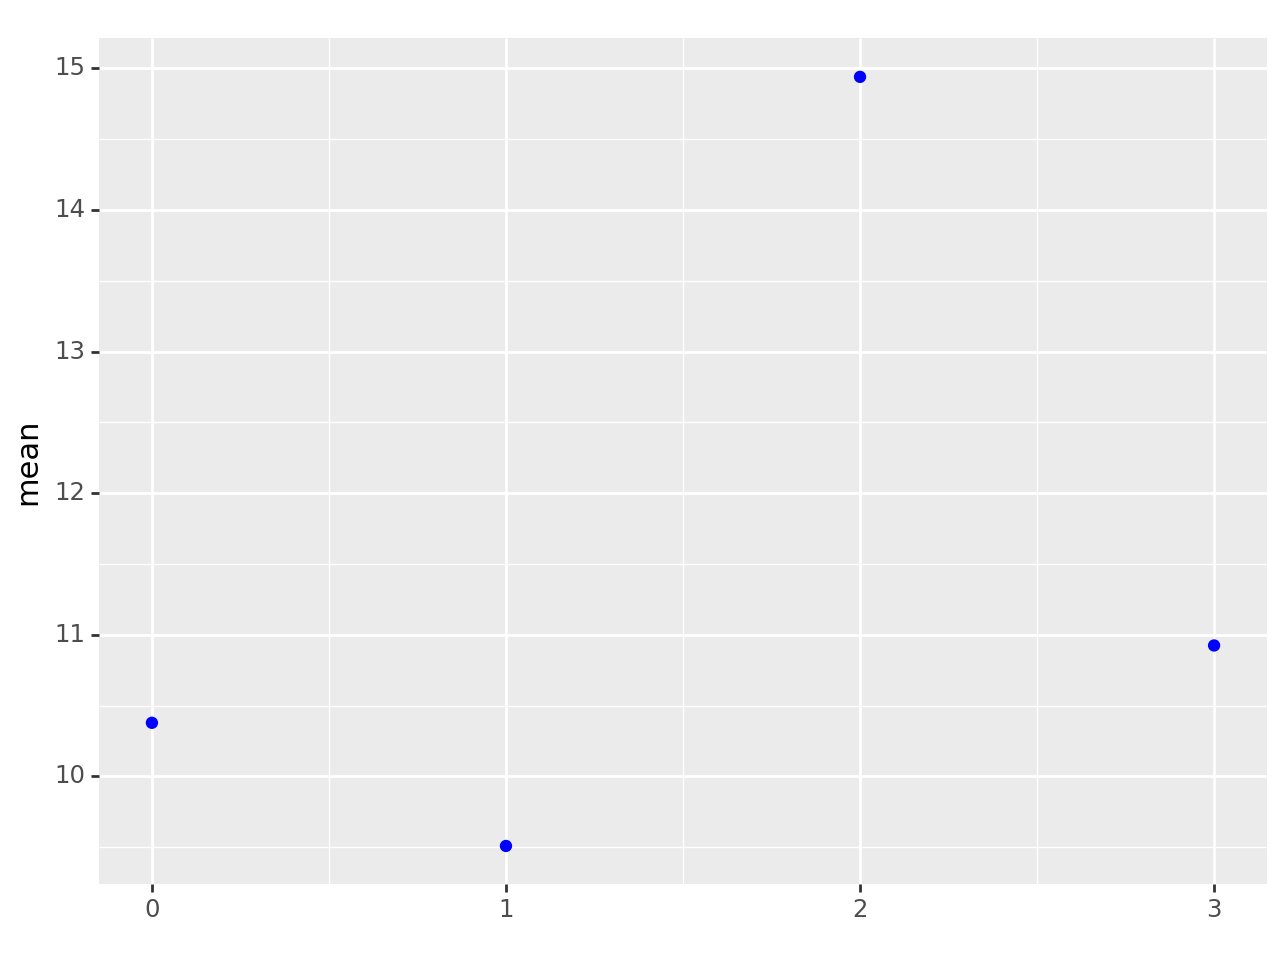

In [ ]:
odf["se"] = odf["sd"] / np.sqrt(odf["count"])

p = (pn.ggplot(odf)
    + pn.geom_point(pn.aes(x = odf["vore"].cat.codes, y = "mean"), color = "blue"))
p.draw()